#YOLOV8 NESNE TANIMA


##Ortam Hazirligi

In [ ]:
%pwd #nerdeyiz

'/content'

In [ ]:
%cd /content/drive/MyDrive/yolov8/1_object_detection

/content/drive/MyDrive/yolov8/1_object_detection


In [ ]:
#ultralytics indir
%pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.80 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/78.2 GB disk)


In [ ]:
#test prediction
!yolo detect predict model=yolov8n.pt source='https://ultralytics.com/images/bus.jpg'  # predict with official model

100% 6.25M/6.25M [00:00<00:00, 177MB/s]
Ultralytics YOLOv8.2.80 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

100% 134k/134k [00:00<00:00, 19.8MB/s]
image 1/1 /content/drive/MyDrive/yolov8/1_object_detection/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 237.9ms
Speed: 13.2ms preprocess, 237.9ms inference, 27.7ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


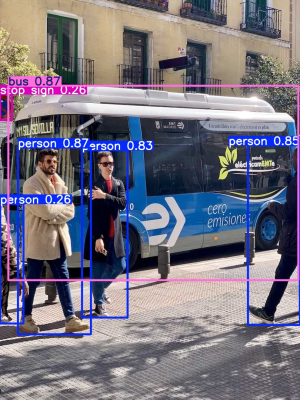

In [ ]:
import cv2
import imutils
from google.colab.patches import cv2_imshow

img=cv2.imread('/content/drive/MyDrive/yolov8/1_object_detection/runs/detect/predict/bus.jpg')
img=imutils.resize(img,width=300)
cv2_imshow(img)


0: 640x480 4 persons, 1 bus, 1 stop sign, 160.0ms
Speed: 6.4ms preprocess, 160.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


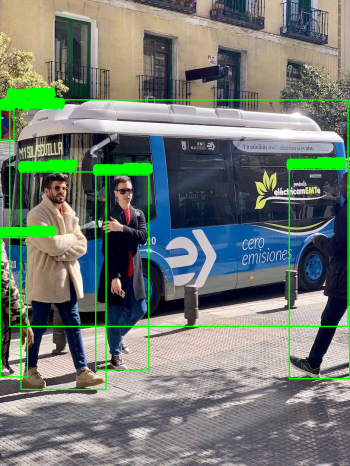

In [ ]:
import cv2
from ultralytics import YOLO #yolo modelini cagirmayi saglar
from google.colab.patches import cv2_imshow
import imutils

img_path="bus.jpg"
model_path="yolov8n.pt"

img=cv2.imread(img_path)
model=YOLO(model_path)
results=model(img)[0]#bu kodu yolonun dokumantasyonundan anladik

threshold=0.5 #esik deger


 #verileri for dongusuyle dolas
for result in results.boxes.data.tolist(): #düzenli sekilde listede tutuo
 x1,y1,x2,y2,score,class_id=result
 x1=int(x1)
 y1=int(y1)
 x2=int(x2)
 y2=int(y2)

 font=cv2.FONT_HERSHEY_DUPLEX
 class_name=model.names[int(class_id)]
 score=score*100
 text=f"{class_name}: %{score:.2f}"


 #print result
 if score>threshold:
  cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)#kordinat renk kalinlik
  cv2.putText(img, text,(x1,y1-10), font, 0.5,(0,255,0), cv2.LINE_AA)

img=imutils.resize(img,width=350)
cv2_imshow(img)



#Training


In [13]:
!unzip /content/drive/MyDrive/yolov8/1_object_detection/data/roboflowdataset.zip -d /content/drive/MyDrive/yolov8/1_object_detection/data

Archive:  /content/drive/MyDrive/yolov8/1_object_detection/data/roboflowdataset.zip
   creating: /content/drive/MyDrive/yolov8/1_object_detection/data/roboflowdataset/
  inflating: /content/drive/MyDrive/yolov8/1_object_detection/data/roboflowdataset/data.yaml  
   creating: /content/drive/MyDrive/yolov8/1_object_detection/data/roboflowdataset/images/
   creating: /content/drive/MyDrive/yolov8/1_object_detection/data/roboflowdataset/images/test/
  inflating: /content/drive/MyDrive/yolov8/1_object_detection/data/roboflowdataset/images/test/y117_jpg.rf.b67b1d53a6a1b029f973c3ca1e1d4232.jpg  
  inflating: /content/drive/MyDrive/yolov8/1_object_detection/data/roboflowdataset/images/test/y123_jpg.rf.48d5b9bc2cfc95626202903a3408ed50.jpg  
  inflating: /content/drive/MyDrive/yolov8/1_object_detection/data/roboflowdataset/images/test/y135_jpg.rf.9659e5df1b7ec530b652b3c7eb320641.jpg  
  inflating: /content/drive/MyDrive/yolov8/1_object_detection/data/roboflowdataset/images/test/y137_jpg.rf.ddf72

In [1]:
!yolo detect train data= /content/drive/MyDrive/yolov8/1_object_detection/data/roboflowdataset/data.yaml model=yolov8n.pt epochs=10 imgsz=640 workers=8 batch=8 device=0 name=roboflow_tumor_detection




100% 6.25M/6.25M [00:00<00:00, 105MB/s]
Ultralytics YOLOv8.2.80 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/yolov8/1_object_detection/data/roboflowdataset/data.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=roboflow_tumor_detection, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, 